In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

## Define Functions

In [2]:
def dydt(t, y):
    return -15*y


def y_exact(t):
    return np.exp(-15*t)


def y_explicit_euler(dydt, t_arr, y0):
    
    assert callable(dydt)
    
    _N_t = t_arr.size
    
    _y_arr = np.empty_like(t_arr, dtype=float)
    _y_arr[0] = y0

    for _t_idx in range(_N_t-1):
        _delta_t = t_arr[_t_idx+1] - t_arr[_t_idx]
        _k1 = dydt(t_arr[_t_idx], _y_arr[_t_idx])
        _y_arr[_t_idx+1] = _y_arr[_t_idx] + _delta_t * _k1
        
    return _y_arr

## Configuration

In [3]:
y0 = 1

N_t = 20
t0 = 0.0

## Propagation

In [4]:
t_arr_small = t0 + np.arange(N_t) * 1/8
y_expl_euler_small_arr = y_explicit_euler(dydt, t_arr_small, y0)

t_arr_large = t0 + np.arange(N_t//2) * 1/4
y_expl_euler_large_arr = y_explicit_euler(dydt, t_arr_large, y0)

y_exact_arr = y_exact(t_arr_small)

## Plot

In [5]:
rcParams['font.size'] = 15

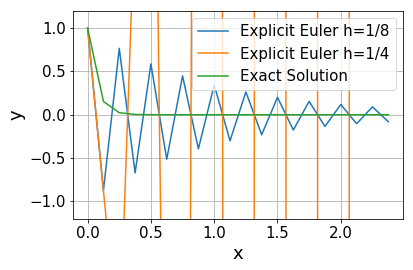

In [6]:
fig, ax = plt.subplots()

ax.plot(t_arr_small, y_expl_euler_small_arr, label='Explicit Euler h=1/8')
ax.plot(t_arr_large, y_expl_euler_large_arr, label='Explicit Euler h=1/4')
ax.plot(t_arr_small, y_exact_arr, label='Exact Solution')

ax.legend()

ax.set_ylim(-1.2,1.2)

ax.set_xlabel("x")
ax.set_ylabel("y")
fig.tight_layout()

In [7]:
# fig.savefig("euler-stability-test-2.png")